In [7]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score


df = pd.read_csv('../data/GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

X=df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]
#für tödliche Unfälle

# KFold-Konfiguration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#für tödliche und schwere vs. leichte Unfälle  -> 1 ist schwer oder tödlich, 0 ist leicht
y = df['UKATEGORIE'].isin([1, 2]).astype(int)





In [8]:
# erstmal alle Parameter einzeln mit class weight 9 und fbeta mit beta = 2
beta = 2
fbeta_scorer= make_scorer(fbeta_score, beta=beta)
class_weight_optimiert = {0:1, 1: 9}

results = []
max = 0

for i in range (1, 1000, 5):
    rf_clas = RandomForestClassifier(n_estimators=i, random_state=42, class_weight=class_weight_optimiert)
    result_fbeta = cross_val_score(rf_clas, X, y, cv=kf, scoring=fbeta_scorer)
    results.append(result_fbeta)
    if result_fbeta.mean() > max: 
        max = i
        print(f"bester score bei: {i} bäumen")
    print(f"Fbeta-score mit {i} bäumen:", result_fbeta.mean())





bester score bei: 1 bäumen
Fbeta-score mit 1 bäumen: 0.20913969037699115
Fbeta-score mit 6 bäumen: 0.07982036519021424
Fbeta-score mit 11 bäumen: 0.10412957875133604
Fbeta-score mit 16 bäumen: 0.0763653477449948
Fbeta-score mit 21 bäumen: 0.08637563923971354
Fbeta-score mit 26 bäumen: 0.07642509437939715
Fbeta-score mit 31 bäumen: 0.08237610217561273
Fbeta-score mit 36 bäumen: 0.07792431172269358
Fbeta-score mit 41 bäumen: 0.08226633731487427
Fbeta-score mit 46 bäumen: 0.07594427086620795
Fbeta-score mit 51 bäumen: 0.08052234016282243
Fbeta-score mit 56 bäumen: 0.0758716865657825
Fbeta-score mit 61 bäumen: 0.07968957751382895
Fbeta-score mit 66 bäumen: 0.07435598639466016
Fbeta-score mit 71 bäumen: 0.07700875124791136
Fbeta-score mit 76 bäumen: 0.07146810090179595
Fbeta-score mit 81 bäumen: 0.07643390454187884
Fbeta-score mit 86 bäumen: 0.07254311698825527
Fbeta-score mit 91 bäumen: 0.07629031747563196
Fbeta-score mit 96 bäumen: 0.07363754749278782
Fbeta-score mit 101 bäumen: 0.0766113

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (64, 5) and (1,)

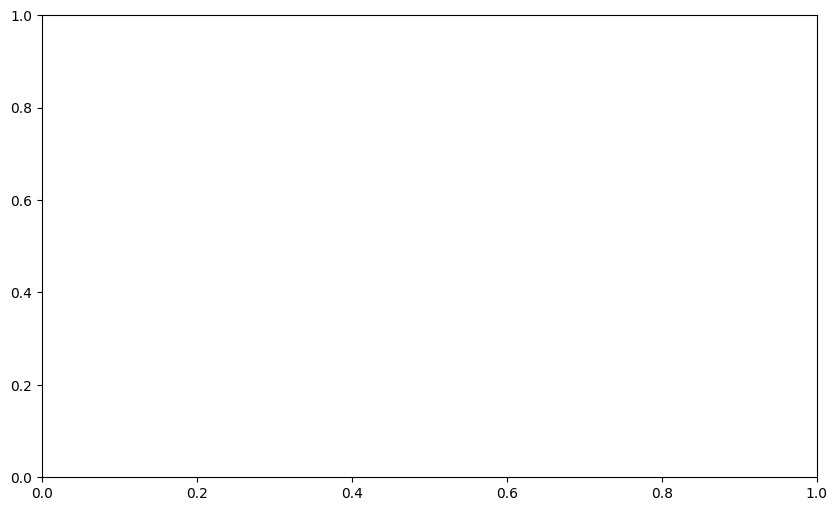

In [9]:
from matplotlib import pyplot as plt

# F1-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(results, i, marker='o')

plt.title('Tuning Anzahl Bäume')
plt.xlabel('Anzahl Bäume')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()